In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784', version= 1)

In [4]:
x,y = mnist.data, mnist['target']
x.shape

(70000, 784)

In [5]:
len(x)

70000

In [6]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
import matplotlib.pyplot as plt

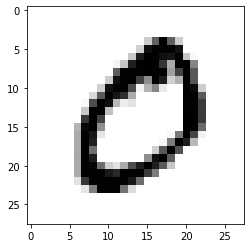

In [8]:
plt.imshow(x[1].reshape(-1,28), cmap= 'binary')
plt.show()

In [9]:
from sklearn.linear_model import SGDClassifier

In [10]:
x_train,x_test = x[:60000],x[60000:]
y_train,y_test = y[:60000],y[60000:]
len(x_train)

60000

In [12]:
import numpy as np
np.random.seed(42)
shuffled_indices = np.random.permutation(60000)

In [13]:
len(shuffled_indices)

60000

In [14]:
shuffled_indices

array([12628, 37730, 39991, ...,   860, 15795, 56422])

In [15]:
x_train = x_train[shuffled_indices]
y_train = y_train[shuffled_indices]

In [16]:
y_train_5 = (y_train == '5')

In [17]:
len(y_train_5)

60000

In [18]:
sgd_clf_5 = SGDClassifier(random_state=42, max_iter= 10)

In [19]:
sgd_clf_5.fit(x_train,y_train_5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(max_iter=10, random_state=42)

In [20]:
y_test[:10]

array(['7', '2', '1', '0', '4', '1', '4', '9', '5', '9'], dtype=object)

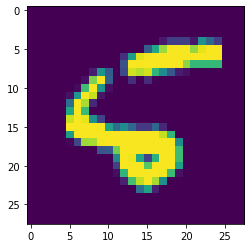

In [21]:
plt.imshow(x_test[8].reshape(28,28))

In [174]:
sgd_clf_5.predict(x_test[8:9])

array([False])

In [22]:
from sklearn.model_selection import cross_val_score

In [32]:
accuracy = cross_val_score(sgd_clf_5,x_train,y_train_5,scoring = 'accuracy', cv = 3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [25]:
accuracy.mean()

0.9612166666666667

In [33]:
from sklearn.model_selection import cross_val_predict
y_pred_cross = cross_val_predict(sgd_clf_5,x_train,y_train_5, cv= 3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [34]:
from sklearn.metrics import classification_report

In [35]:
report = classification_report(y_train_5,y_pred_cross,output_dict = True)
report['True']

{'precision': 0.739423076923077,
 'recall': 0.8511344770337577,
 'f1-score': 0.7913558013892462,
 'support': 5421}

# without cross val score

In [44]:
y_pred = sgd_clf_5.predict(x_train)
np.unique(y_pred)

array([False,  True])

In [47]:
report_sgd = classification_report(y_train_5,y_pred,output_dict=True)

In [49]:
report_sgd['True']

{'precision': 0.9399271844660194,
 'recall': 0.5714812765172478,
 'f1-score': 0.7107949982792247,
 'support': 5421}

In [60]:
sgd_clf_5.decision_function([x_train[99]])

array([-127271.64562544])